### Recover timing errors from a list of antennas

timing t_i, initial time y, \
distance d(i) to receiver i from emit, \
error s_i


t_a = y + d(a)/v + s_a \
t_b = y + d(b)/v + s_b

-----

y = t_a - d(a)/v + s_a

t_b = t_a - d(a)/v + s_a + d(b)/v + s_b \
    = t_a - d(a)/v + d(b)/v + s_b + s_a

s_b - s_a = t_b - t_a + (d(b) - d(a))/v

In [1]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(12345)

In [2]:
N = 50
D = 2
emit_location = rng.random((1, D))
velocity = 1


def distance(x, y = emit_location):
    return np.sqrt( np.sum((x - y)**2, axis=-1) )

actual_err_timings = 2 * rng.random(N) - 1
if not True:
    # undo timing errors
    actual_err_timings = np.zeros_like(actual_err_timings)

actual_locations = rng.random((N, D))

actual_timings = distance(actual_locations)/velocity

In [3]:
# Create data to work with
timings = actual_timings + actual_err_timings

## use the first number as reference
ref_timing = timings[0]
timings = timings

ref_err_timing = actual_err_timings[0]
err_timings = actual_err_timings

ref_location = actual_locations[0]
locations = actual_locations

  	 Timing         	 Error          	 Location
0 	 1.2114015836686018 	 0.7973654573327341 	 [0.61682898 0.17632632]
1 	 0.8223537613300713 	 0.6762546707509746 	 [0.30438839 0.44088681]
2 	 0.5164764930422616 	 0.391109550601909 	 [0.15020234 0.21792886]
3 	 0.626893985846481 	 0.33281392786638453 	 [0.47433312 0.47636886]
4 	 0.632169930455275 	 0.5983087535871898 	 [0.25523235 0.29756527]
5 	 0.2631030324439694 	 0.18673418560371335 	 [0.27906712 0.26057921]
6 	 0.9488374167867456 	 0.6727560440146213 	 [0.48276159 0.21197904]
7 	 1.2192047533568204 	 0.9418028652699372 	 [0.4956306  0.24626133]
8 	 0.8744783753275451 	 0.248245714629571 	 [0.83848265 0.18013059]
9 	 1.5986254396525794 	 0.9488811518333182 	 [0.86215629 0.17829944]
10 	 1.267555999078216 	 0.6672374531003724 	 [0.75053133 0.6111204 ]
---
Ref: 	 1.2114015836686018 	 0.7973654573327341 	 [0.61682898 0.17632632]


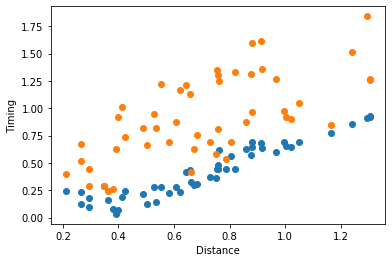

In [4]:
# show data
N_clip = min(N, 10)
print(" ", "\t", "Timing        ", "\t", "Error         ", "\t", "Location")
for i, _ in enumerate(timings):
    print(i, "\t", timings[i], "\t", err_timings[i], "\t", locations[i])
    if i > N_clip - 1:
        break
print('---')
print("Ref:", "\t", ref_timing, "\t", ref_err_timing, "\t", ref_location)

# plot
if True:
    fig, ax = plt.subplots()
    ax.plot(distance(locations, 0), actual_timings, 'o', label='actual')
    ax.plot(distance(locations, 0), timings, 'o', label='with errors' )
    ax.set_xlabel("Distance")
    ax.set_ylabel("Timing")
    ax.legend()
    plt.show();

In [5]:
# s_b - s_a = t_b - t_a - (d(b) - d(a))/v

calc_err_timings = timings - ref_timing - (distance(locations) - distance(ref_location))/velocity

N_clip = min(N, 10)

print("Clipped to [:{}]:".format(N_clip))
print((distance(locations) - distance(ref_location))[:N_clip])
print((timings - ref_timing)[:N_clip])
print('---- + ')

print("Calc", calc_err_timings[:N_clip])

print('---'*5)
print("Correct result:", np.allclose(calc_err_timings + ref_err_timing, actual_err_timings))


Clipped to [:10]:
[ 0.         -0.26793704 -0.28866918 -0.11995607 -0.38017495 -0.33766728
 -0.13795475 -0.13663424  0.21219653  0.23570816]
[ 0.         -0.38904782 -0.69492509 -0.5845076  -0.57923165 -0.94829855
 -0.26256417  0.00780317 -0.33692321  0.38722386]
---- + 
Calc [ 0.         -0.12111079 -0.40625591 -0.46455153 -0.1990567  -0.61063127
 -0.12460941  0.14443741 -0.54911974  0.15151569]
---------------
Correct result: True


In [6]:
if True:
    print('---'*5)
    print("Actual error:", actual_err_timings)
    print("Calc+ref error:", calc_err_timings + ref_err_timing)

---------------
Actual error: [0.79736546 0.67625467 0.39110955 0.33281393 0.59830875 0.18673419
 0.67275604 0.94180287 0.24824571 0.94888115 0.66723745 0.09589794
 0.44183967 0.88647992 0.6974535  0.32647286 0.73392816 0.22013496
 0.08159457 0.1598956  0.34010018 0.46519315 0.26642103 0.8157764
 0.19329439 0.12946908 0.09166475 0.59856801 0.8547419  0.60162124
 0.93198836 0.72478136 0.86055132 0.9293378  0.54618601 0.93767296
 0.49498794 0.27377318 0.45177871 0.66503892 0.33089093 0.90345401
 0.25707418 0.33982834 0.2588534  0.35544648 0.00502233 0.62860454
 0.28238271 0.06808769]
Calc+ref error: [0.79736546 0.67625467 0.39110955 0.33281393 0.59830875 0.18673419
 0.67275604 0.94180287 0.24824571 0.94888115 0.66723745 0.09589794
 0.44183967 0.88647992 0.6974535  0.32647286 0.73392816 0.22013496
 0.08159457 0.1598956  0.34010018 0.46519315 0.26642103 0.8157764
 0.19329439 0.12946908 0.09166475 0.59856801 0.8547419  0.60162124
 0.93198836 0.72478136 0.86055132 0.9293378  0.54618601 0.937